In [1]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy import interpolate
from os.path import join, abspath
import sys
from os import pardir, mkdir
from scipy.stats import norm

# styling
plt.style.use('seaborn-v0_8-whitegrid')
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern"]}
plt.rcParams.update(params)

In [2]:
# import utils
util_dir = abspath(pardir)
sys.path.insert(0, util_dir)
from utils import load_spectral_types

In [3]:
# root data directory path
root_data_dir = abspath(join(pardir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [4]:
# create directory "Spectral-Class" in Data dir, if it doesn't exist
name = "Spectral-Class"
data_dir = join(root_data_dir, name)
try:
    mkdir(data_dir)
    print(f"Creating {name} dir in Data dir")
except FileExistsError:
    print("Directory already exist. Good to go!")

Directory already exist. Good to go!


In [5]:
# path to best-pars, created at 3.3. Best-pars.ipynb
gaia_dir = join(root_data_dir, "Neighbour")
files = glob(join(gaia_dir, "*.hdf5"))
files[:5]

['/home2/s20321005/Thesis-Project/Data/Neighbour/neighbour.hdf5']

In [6]:
# load best pars data
df = vaex.open_many(files)
df

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,0.010526307611580561,-1.5069479765134466,11.213,10.416,AAA,4616283493156832640,64.95028,-64.84678804028577,0.012385076,3.665080655375059,0.012390014,11.816099401085904,0.010756382,13.39838,14.354399,12.430805,817.97473,2392.0107,1.0612296,1.3268741,2.1613254142300296,-0.5358186393427844,84.852,84.6924,85.3004,0.3554,0.3498,0.3623,M,--,32.41990661621094,1.0216929912567139,gaia,3918.379638671875,5.97119140625,8.631103515625,0.0,gspphot,4.763700008392334,0.004499912261962891,0.010499954223632812,0.0,gspphot,-0.4165000021457672,0.039000004529953,0.03979998826980591,0.0,gspphot,0.07999999821186066,0.04999999888241291,0.07000000774860382,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.79699993,6.575370976314297,84.63029685651593,-43.20758491657852,72.76944243086287,64.06734159660076,10.673072476874871,0.01238531435714347,0.012389775429348222,4.281477484502003,25.70046077472735,0.006316063581639582,0.023917262738082538,-12.87039250998578,0.5216486401636996,30.062175421832617,0.8785096227461723,4.609353189730783,0.4895579458545102,-39.28106335498894,0.7298521839148095
1,0.009947399351986562,-1.4741853713800026,11.75,10.915,AAA,4617667606497642368,17.977585,-0.17262960984553632,0.0150076,17.976755781051242,0.0134245,7.029261215530585,0.011353876,13.687114,14.494421,12.8082485,1078.7208,2067.6946,1.0101151,1.2904923,2.1699227065693796,-0.5677539259120619,nan,nan,nan,nan,nan,nan,K,--,48.249412536621094,1.7350472211837769,gaia,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.83500004,5.9845484125253865,142.2624610664035,-76.5001755789673,119.94303216551242,4.207349610198228,-17.47832253539565,0.01493170232219195,0.01350886843944294,-11.786053509397416,2.837117093938337,-0.021104384113212568,0.011062597394465627,-35.88257568124676,0.9331734551441357,34.34177674400418,1.4628812519752585,-17.02308452820295,0.8250003773909808,-29.96033138143503,1.2081052585542995
2,0.010653943539778906,-1.4792054270009287,13.134,12.317,AAA,4617601567080525696,19.89435,-18.57644369982859,0.035945002,-7.12045526211935,0.036764037,5.814933551816721,0.028319241,15.729542,17.009684,14.611902,176.59393,689.67365,1.068048,1.4013869,2.168515313114387,-0.5628743542169623,171.8243,170.5648,174.2696,0.4268,0.4198,0.433,M,--,nan,nan,--,3588.7626953125,3.59375,3.5283203125,0.0,gspphot,4.771900177001953,0.008300304412841797,0.006099700927734375,0.0,gspphot,-0.03759999945759773,0.016300000250339508,0.017299998551607132,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.81699944,6.956723606222691,171.9710106898086,-91.76705233314686,145.4401479088898,16.517775929900683,11.088201928281167,0.03598627036182269,0.03672364252112022,9.038465645687793,13.464342663600737,0.05323251028082858,0.07183479882735357,nan,nan,nan,nan,nan,nan,nan,nan
3,0.016341378160082746,-1.479983459874883,10.771,9.922,AAA,4617597821869045376,165.77199,-158.5591365798796,0.0195189,48.36682806934114,0.021476625,33.304022686789395,0.015516205,13.741122,15.407431,12.503449,374.39804,1426.038,1.3580959,1.4723712,2.16772823088462,-0.5622315617141247,29.8859,29.8674,29.9026,0.0,0.0,1e-04,M,--,16.0080623626709,1.5245096683502197,gaia,3156.3876953125,0.260009765625,0.33251953125,0.0,gspphot,4.99630022048

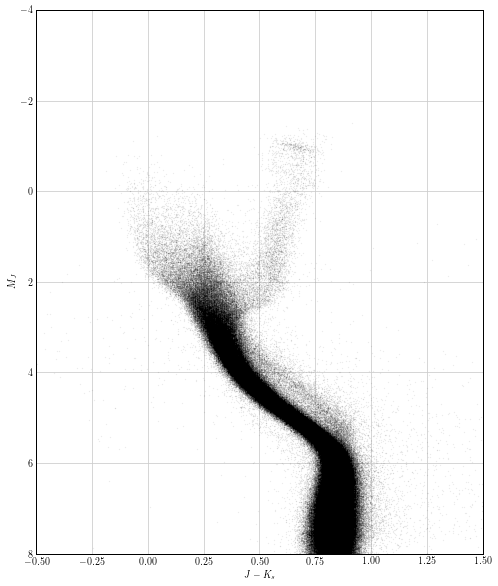

In [7]:
# HR diagram
JK = np.linspace(0, 0.86, 100)
plt.figure(figsize=(8,10))
df.viz.scatter("JK", "M_J", c='k', alpha=0.1, s=0.1, length_check=False)
plt.xlabel(r"$J-K_s$")
plt.ylabel(r"$M_J$")
plt.xlim(-0.5, 1.5)
plt.ylim(-4, 8)
plt.gca().invert_yaxis()
# to save it, uncomment the following line
# plt.savefig(join(gaia_dir, "HR-diagram.pdf"), format="pdf", dpi=70)
plt.show()

In [8]:
# load spectral type classification
df_s = load_spectral_types()
df_s

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [9]:
# save classification it into numpy array
jk = df_s["J-K"].to_numpy()
mj = df_s["M_J"].to_numpy()
# cut it below M_J < 5
check = mj < 5
jk = jk[check]
mj = mj[check]

In [10]:
# hand drawn boundaries, need improvement
up_x = np.loadtxt(join(root_data_dir, "upper.csv"), delimiter=",", usecols=0)
up_y = np.loadtxt(join(root_data_dir, "upper.csv"), delimiter=",", usecols=1)

low_x = np.loadtxt(join(root_data_dir, "lower.csv"), delimiter=",", usecols=0)
low_y = np.loadtxt(join(root_data_dir, "lower.csv"), delimiter=",", usecols=1)

In [11]:
# interpolate the boundaries, to make it smooth
j_interp = interpolate.interp1d(jk, mj, kind='cubic')
jks = np.linspace(jk.min(), jk.max(), 100)

j_upper = interpolate.interp1d(up_x, up_y, fill_value="extrapolate")(jks)
j_lower = interpolate.interp1d(low_x, low_y, fill_value="extrapolate")(jks)+0.15

In [12]:
# interpolated boundaries
j_lower_interp = interpolate.interp1d(jks, j_lower, kind='cubic', fill_value="extrapolate")
j_upper_interp = interpolate.interp1d(jks, j_upper, kind='cubic', fill_value="extrapolate")

df_mask_65 = df.filter("JK < 0.65").filter("JK > -0.019")
df_mask_65 = df.extract()

df_mask_65["M_J_lower"] = j_lower_interp(df_mask_65["JK"].to_numpy())
df_mask_65["M_J_upper"] = j_upper_interp(df_mask_65["JK"].to_numpy())
df_mask_65

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.010526307611580561,-1.5069479765134466,11.213,10.416,AAA,4616283493156832640,64.95028,-64.84678804028577,0.012385076,3.665080655375059,0.012390014,11.816099401085904,0.010756382,13.39838,14.354399,12.430805,817.97473,2392.0107,1.0612296,1.3268741,2.1613254142300296,-0.5358186393427844,84.852,84.6924,85.3004,0.3554,0.3498,0.3623,M,--,32.41990661621094,1.0216929912567139,gaia,3918.379638671875,5.97119140625,8.631103515625,0.0,gspphot,4.763700008392334,0.004499912261962891,0.010499954223632812,0.0,gspphot,-0.4165000021457672,0.039000004529953,0.03979998826980591,0.0,gspphot,0.07999999821186066,0.04999999888241291,0.07000000774860382,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.79699993,6.575370976314297,84.63029685651593,-43.20758491657852,72.76944243086287,64.06734159660076,10.673072476874871,0.01238531435714347,0.012389775429348222,4.281477484502003,25.70046077472735,0.006316063581639582,0.023917262738082538,-12.87039250998578,0.5216486401636996,30.062175421832617,0.8785096227461723,4.609353189730783,0.4895579458545102,-39.28106335498894,0.7298521839148095,5.274227298919868,5.724228230022163
1,0.009947399351986562,-1.4741853713800026,11.75,10.915,AAA,4617667606497642368,17.977585,-0.17262960984553632,0.0150076,17.976755781051242,0.0134245,7.029261215530585,0.011353876,13.687114,14.494421,12.8082485,1078.7208,2067.6946,1.0101151,1.2904923,2.1699227065693796,-0.5677539259120619,nan,nan,nan,nan,nan,nan,K,--,48.249412536621094,1.7350472211837769,gaia,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.83500004,5.9845484125253865,142.2624610664035,-76.5001755789673,119.94303216551242,4.207349610198228,-17.47832253539565,0.01493170232219195,0.01350886843944294,-11.786053509397416,2.837117093938337,-0.021104384113212568,0.011062597394465627,-35.88257568124676,0.9331734551441357,34.34177674400418,1.4628812519752585,-17.02308452820295,0.8250003773909808,-29.96033138143503,1.2081052585542995,5.4159946919053255,5.843852436790257
2,0.010653943539778906,-1.4792054270009287,13.134,12.317,AAA,4617601567080525696,19.89435,-18.57644369982859,0.035945002,-7.12045526211935,0.036764037,5.814933551816721,0.028319241,15.729542,17.009684,14.611902,176.59393,689.67365,1.068048,1.4013869,2.168515313114387,-0.5628743542169623,171.8243,170.5648,174.2696,0.4268,0.4198,0.433,M,--,nan,nan,--,3588.7626953125,3.59375,3.5283203125,0.0,gspphot,4.771900177001953,0.008300304412841797,0.006099700927734375,0.0,gspphot,-0.03759999945759773,0.016300000250339508,0.017299998551607132,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.81699944,6.956723606222691,171.9710106898086,-91.76705233314686,145.4401479088898,16.517775929900683,11.088201928281167,0.03598627036182269,0.03672364252112022,9.038465645687793,13.464342663600737,0.05323251028082858,0.07183479882735357,nan,nan,nan,nan,nan,nan,nan,nan,5.349391633886626,5.786087504740863
3,0.016341378160082746,-1.479983459874883,10.771,9.922,AAA,4617597821869045376,165.77199,-158.5591365798796,0.0195189,48.36682806934114,0.021476625,33.304022686789395,0.015516205,13.741122,15.407431,12.503449,374.39804,1426.038,1.3580959,1.4723712,2.16772823088462,-0.5622315617141247,29.8859,29.8674,29.9026,0

In [13]:
# AG
# JK_lower = (df_s[df_s['SpT'] == 'B9V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'A0V']['J-K'].to_numpy()[0])/2
# JK_upper = (df_s[df_s['SpT'] == 'G3V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'G4V']['J-K'].to_numpy()[0])/2
JK_lower = df_s[df_s['SpT'] == 'B8V']['J-K'].to_numpy()[0]
JK_upper = df_s[df_s['SpT'] == 'G5V']['J-K'].to_numpy()[0]
print(JK_lower, JK_upper)

mask = ((df_mask_65['JK'] > JK_lower)
          *(df_mask_65['JK'] < JK_upper)
          *(df_mask_65['M_J_lower'] < df_mask_65['M_J'])
          *(df_mask_65['M_J_upper'] > df_mask_65['M_J']))

df_AG = df_mask_65[mask].extract()
df_AG

-0.064 0.386


#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.004301747913975464,-1.3713712365508404,8.77,8.402,AAA,4635683001439449856,52.405643,6.083750336375101,0.014473084,-52.05131516947817,0.0170755,6.084070263466513,0.012370593,9.739897,10.054115,9.259166,2948.124,3927.41,0.98334277,1.198375,2.2006728782412583,-0.667469077944412,164.0287,163.6091,164.8086,0.0013,0.0002,0.0046,G,--,10.902939796447754,0.16833698749542236,gaia,5751.5439453125,2.11181640625,5.791015625,0.0,gspphot,4.159900188446045,0.0024003982543945312,0.0015997886657714844,0.0,gspphot,-0.10779999941587448,0.005900003015995026,0.007100000977516174,0.0,gspphot,0.019999999552965164,0.009999999776482582,0.019999999552965164,0.0,gspspec,-0.15000000596046448,0.12000000476837158,0.12000000663101673,0.0,gspspec,-0.15000000596046448,nan,nan,nan,--,0.36800003,2.690971562626711,164.36365076267728,-101.74113412975117,129.0897026025985,-18.774503486840842,48.92718516173083,0.014645726854753158,0.0169276560588158,38.118372672189736,-14.626909728836896,0.07861918077846189,-0.03185425505242847,23.188897995532177,0.12112157767100891,32.158349477759415,0.14088250554201617,-30.762724218692966,0.08688682310685122,-17.37126155447248,0.11538307459562744,2.5783971929631515,4.142245110066469
1,0.0032882177640498373,-1.2621910830881986,7.8,7.597,AAA,4701758461948318848,20.874498,-16.354367148195085,0.014716353,12.9722529499503,0.016420288,8.410454649576556,0.012681514,8.464083,8.652515,8.128385,1851.481,3608.0237,0.9388913,1.1831161,2.238763800213232,-0.7728458234774394,118.5254,117.8161,118.8247,0.0021,0.0003,0.0173,F,--,-1.0309404134750366,0.07304781675338745,apogee,6724.49755859375,3.4951171875,30.11328125,0.0,gspphot,4.15500020980835,0.0029001235961914062,0.013399600982666016,0.0,gspphot,-0.09715799987316132,0.0066741290502250195,0.0066741290502250195,1.0,apogee,0.699999988079071,0.039999961853027344,0.030000030994415283,0.0,gspspec,nan,nan,nan,nan,--,nan,0.005179196130484343,0.005179196130484343,1.0,apogee,0.20300007,2.424097557634834,118.89963642457157,-83.01280883143107,85.12342281541306,19.271926379475985,-8.021067574800421,0.014849782526185832,0.016299719960636998,-4.520547567124471,10.861354688276615,-0.011438887118832902,0.018391563582343014,-2.5166033425421523,0.05165351942975348,-3.8942131501853767,0.0529031719415193,10.939099198333349,0.035807943847210796,-3.6701540093908616,0.043067230813140504,1.3903859664790936,2.847701908629568
2,0.0071074868596039875,-1.2273890258172142,8.69,8.393,AAA,4702959678401321984,37.18967,23.58711228133474,0.011803952,-28.752733940266236,0.014449707,8.74803741556182,0.012488439,9.653302,9.947792,9.193761,2110.065,3865.7065,0.9105442,1.1956643,2.2506821387235147,-0.8066398204825131,114.0146,113.8348,114.2071,0.0009,0.0002,0.0024,G,--,24.771608352661133,0.21023516356945038,gaia,5889.33837890625,1.6259765625,2.79736328125,0.0,gspphot,4.333700180053711,0.0020003318786621094,0.00189971923828125,0.0,gspphot,-0.0892999991774559,0.004799999296665192,0.00469999760389328,0.0,gspphot,0.09000000357627869,0.01000000536441803,0.019999995827674866,0.0,gspspec,-0.05000000074505806,0.12000000104308128,0.10999999940395355,0.0,gspspec,-0.05000000074505806,nan,nan,nan,--,0.29699993,3.399552739669738,114.31135379246405,-82.528939581882,79.0952573632323,-30.63629306822048,21.0

In [14]:
df_rv_nan = df_AG[df_AG.rv.isnan()]
none = len(df_rv_nan)

df_rv = df_AG.groupby('rv_cat', agg={'count': vaex.agg.count('rv_cat')})
df_rv = df_rv.to_pandas_df()
df_rv.at[0, 'count'] = none
df_rv.sort_values(by='rv_cat', ascending=True, inplace=True)
df_rv

,rv_cat,count
2,apogee,4146
5,gaia,53092
1,galah,466
4,lamost,577
3,rave,719
0,None,2129


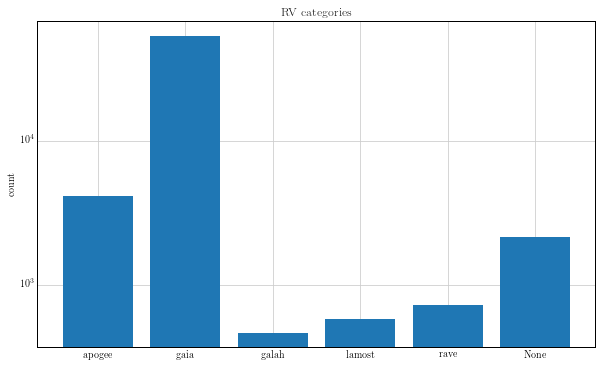

In [15]:
x = df_rv['rv_cat'].values.astype(str)
y = df_rv['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('RV categories')
ax.yaxis.grid(True)
plt.show()

In [16]:
df_rv = df_AG[df_AG.rv.notnan()].extract()
df_rv

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.004301747913975464,-1.3713712365508404,8.77,8.402,AAA,4635683001439449856,52.405643,6.083750336375101,0.014473084,-52.05131516947817,0.0170755,6.084070263466513,0.012370593,9.739897,10.054115,9.259166,2948.124,3927.41,0.98334277,1.198375,2.2006728782412583,-0.667469077944412,164.0287,163.6091,164.8086,0.0013,0.0002,0.0046,G,--,10.902939796447754,0.16833698749542236,gaia,5751.5439453125,2.11181640625,5.791015625,0.0,gspphot,4.159900188446045,0.0024003982543945312,0.0015997886657714844,0.0,gspphot,-0.10779999941587448,0.005900003015995026,0.007100000977516174,0.0,gspphot,0.019999999552965164,0.009999999776482582,0.019999999552965164,0.0,gspspec,-0.15000000596046448,0.12000000476837158,0.12000000663101673,0.0,gspspec,-0.15000000596046448,nan,nan,nan,--,0.36800003,2.690971562626711,164.36365076267728,-101.74113412975117,129.0897026025985,-18.774503486840842,48.92718516173083,0.014645726854753158,0.0169276560588158,38.118372672189736,-14.626909728836896,0.07861918077846189,-0.03185425505242847,23.188897995532177,0.12112157767100891,32.158349477759415,0.14088250554201617,-30.762724218692966,0.08688682310685122,-17.37126155447248,0.11538307459562744,2.5783971929631515,4.142245110066469
1,0.0032882177640498373,-1.2621910830881986,7.8,7.597,AAA,4701758461948318848,20.874498,-16.354367148195085,0.014716353,12.9722529499503,0.016420288,8.410454649576556,0.012681514,8.464083,8.652515,8.128385,1851.481,3608.0237,0.9388913,1.1831161,2.238763800213232,-0.7728458234774394,118.5254,117.8161,118.8247,0.0021,0.0003,0.0173,F,--,-1.0309404134750366,0.07304781675338745,apogee,6724.49755859375,3.4951171875,30.11328125,0.0,gspphot,4.15500020980835,0.0029001235961914062,0.013399600982666016,0.0,gspphot,-0.09715799987316132,0.0066741290502250195,0.0066741290502250195,1.0,apogee,0.699999988079071,0.039999961853027344,0.030000030994415283,0.0,gspspec,nan,nan,nan,nan,--,nan,0.005179196130484343,0.005179196130484343,1.0,apogee,0.20300007,2.424097557634834,118.89963642457157,-83.01280883143107,85.12342281541306,19.271926379475985,-8.021067574800421,0.014849782526185832,0.016299719960636998,-4.520547567124471,10.861354688276615,-0.011438887118832902,0.018391563582343014,-2.5166033425421523,0.05165351942975348,-3.8942131501853767,0.0529031719415193,10.939099198333349,0.035807943847210796,-3.6701540093908616,0.043067230813140504,1.3903859664790936,2.847701908629568
2,0.0071074868596039875,-1.2273890258172142,8.69,8.393,AAA,4702959678401321984,37.18967,23.58711228133474,0.011803952,-28.752733940266236,0.014449707,8.74803741556182,0.012488439,9.653302,9.947792,9.193761,2110.065,3865.7065,0.9105442,1.1956643,2.2506821387235147,-0.8066398204825131,114.0146,113.8348,114.2071,0.0009,0.0002,0.0024,G,--,24.771608352661133,0.21023516356945038,gaia,5889.33837890625,1.6259765625,2.79736328125,0.0,gspphot,4.333700180053711,0.0020003318786621094,0.00189971923828125,0.0,gspphot,-0.0892999991774559,0.004799999296665192,0.00469999760389328,0.0,gspphot,0.09000000357627869,0.01000000536441803,0.019999995827674866,0.0,gspspec,-0.05000000074505806,0.12000000104308128,0.10999999940395355,0.0,gspspec,-0.05000000074505806,nan,nan,nan,--,0.29699993,3.399552739669738,114.31135379246405,-82.528939581882,79.0952573632323,-30.63629306822048,21.0

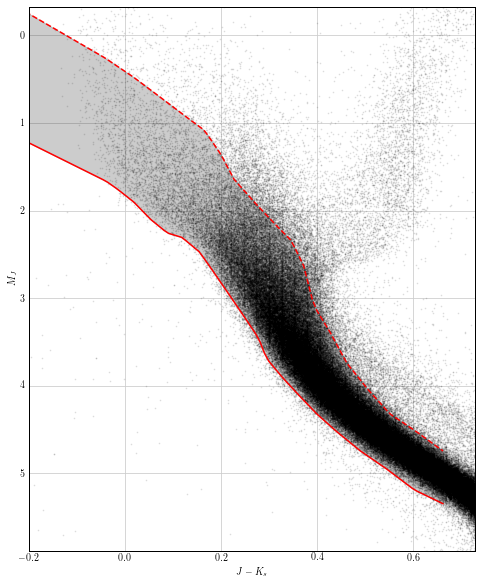

In [17]:
# HR diagram
plt.figure(figsize=(8,10))
df.viz.scatter("JK", "M_J", c='k', alpha=0.1, s=0.5, length_check=False)
# df_rv.viz.scatter("JK", "M_J", c='r', alpha=0.1, s=0.5, length_check=False)
plt.plot(jks, j_upper, 'r')
plt.fill_between(jks, j_upper, j_lower, alpha=0.2, color="k")
# plt.plot(jks, j_upper-1.4, 'r')
plt.plot(jks, j_lower, 'r--')
plt.xlabel(r"$J-K_s$")
plt.ylabel(r"$M_J$")
plt.xlim(-0.2, jks[-1]*1.1)
plt.ylim(j_lower.min()*0.9, j_upper.max()*1.1)
plt.gca().invert_yaxis()
plt.show()

In [18]:
df.export(join(data_dir, "all.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     3.30s =  0.1m =  0.0h 
 

In [8]:
df_rv.export(join(data_dir, "AG-extend.hdf5"), progress=True)

NameError: name 'df_rv' is not defined

In [9]:
df_rv = vaex.open(join(data_dir, "AG-extend.hdf5"))
df_rv

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.004301747913975464,-1.3713712365508404,8.77,8.402,AAA,4635683001439449856,52.405643,6.083750336375101,0.014473084,-52.05131516947817,0.0170755,6.084070263466513,0.012370593,9.739897,10.054115,9.259166,2948.124,3927.41,0.98334277,1.198375,2.2006728782412583,-0.667469077944412,164.0287,163.6091,164.8086,0.0013,0.0002,0.0046,G,--,10.902939796447754,0.16833698749542236,gaia,5751.5439453125,2.11181640625,5.791015625,0.0,gspphot,4.159900188446045,0.0024003982543945312,0.0015997886657714844,0.0,gspphot,-0.10779999941587448,0.005900003015995026,0.007100000977516174,0.0,gspphot,0.019999999552965164,0.009999999776482582,0.019999999552965164,0.0,gspspec,-0.15000000596046448,0.12000000476837158,0.12000000663101673,0.0,gspspec,-0.15000000596046448,nan,nan,nan,--,0.36800003,2.690971562626711,164.36365076267728,-101.74113412975117,129.0897026025985,-18.774503486840842,48.92718516173083,0.014645726854753158,0.0169276560588158,38.118372672189736,-14.626909728836896,0.07861918077846189,-0.03185425505242847,23.188897995532177,0.12112157767100891,32.158349477759415,0.14088250554201617,-30.762724218692966,0.08688682310685122,-17.37126155447248,0.11538307459562744,2.5783971929631515,4.142245110066469
1,0.0032882177640498373,-1.2621910830881986,7.8,7.597,AAA,4701758461948318848,20.874498,-16.354367148195085,0.014716353,12.9722529499503,0.016420288,8.410454649576556,0.012681514,8.464083,8.652515,8.128385,1851.481,3608.0237,0.9388913,1.1831161,2.238763800213232,-0.7728458234774394,118.5254,117.8161,118.8247,0.0021,0.0003,0.0173,F,--,-1.0309404134750366,0.07304781675338745,apogee,6724.49755859375,3.4951171875,30.11328125,0.0,gspphot,4.15500020980835,0.0029001235961914062,0.013399600982666016,0.0,gspphot,-0.09715799987316132,0.0066741290502250195,0.0066741290502250195,1.0,apogee,0.699999988079071,0.039999961853027344,0.030000030994415283,0.0,gspspec,nan,nan,nan,nan,--,nan,0.005179196130484343,0.005179196130484343,1.0,apogee,0.20300007,2.424097557634834,118.89963642457157,-83.01280883143107,85.12342281541306,19.271926379475985,-8.021067574800421,0.014849782526185832,0.016299719960636998,-4.520547567124471,10.861354688276615,-0.011438887118832902,0.018391563582343014,-2.5166033425421523,0.05165351942975348,-3.8942131501853767,0.0529031719415193,10.939099198333349,0.035807943847210796,-3.6701540093908616,0.043067230813140504,1.3903859664790936,2.847701908629568
2,0.0071074868596039875,-1.2273890258172142,8.69,8.393,AAA,4702959678401321984,37.18967,23.58711228133474,0.011803952,-28.752733940266236,0.014449707,8.74803741556182,0.012488439,9.653302,9.947792,9.193761,2110.065,3865.7065,0.9105442,1.1956643,2.2506821387235147,-0.8066398204825131,114.0146,113.8348,114.2071,0.0009,0.0002,0.0024,G,--,24.771608352661133,0.21023516356945038,gaia,5889.33837890625,1.6259765625,2.79736328125,0.0,gspphot,4.333700180053711,0.0020003318786621094,0.00189971923828125,0.0,gspphot,-0.0892999991774559,0.004799999296665192,0.00469999760389328,0.0,gspphot,0.09000000357627869,0.01000000536441803,0.019999995827674866,0.0,gspspec,-0.05000000074505806,0.12000000104308128,0.10999999940395355,0.0,gspspec,-0.05000000074505806,nan,nan,nan,--,0.29699993,3.399552739669738,114.31135379246405,-82.528939581882,79.0952573632323,-30.63629306822048,21.0

In [10]:
# check Bensby et al (2014)
# Bensby, T., Feltzing, S., Oey, M.S. 2014. Exploring the Milky Way Stellar Disk: A Detailed Elmental Abundance Study of 714 F and G Dwarf Stars in the Solar Neighbourhood. Astronomy& Astrophysics
df_rv["u_LSR"] = df_rv["u"]# - 11.1
df_rv["v_LSR"] = df_rv["v"]# - 12.4
df_rv["w_LSR"] = df_rv["w"] + 7.25

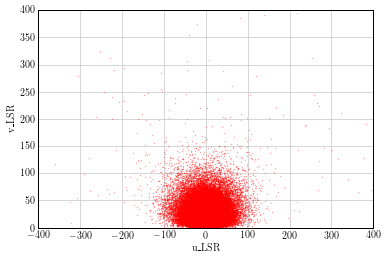

In [11]:
df_rv.viz.scatter("u_LSR", "(v_LSR**2+w_LSR**2)**(1/2)", c='r', alpha=0.5, s=0.1, length_check=False)
plt.xlabel("u_LSR")
plt.ylabel("v_LSR")
plt.xlim(-400, 400)
plt.ylim(0, 400)
plt.show()

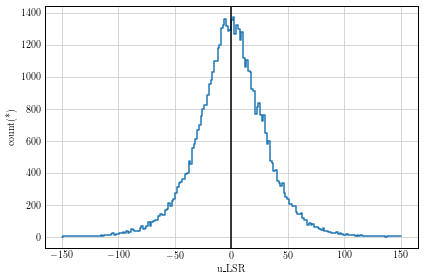

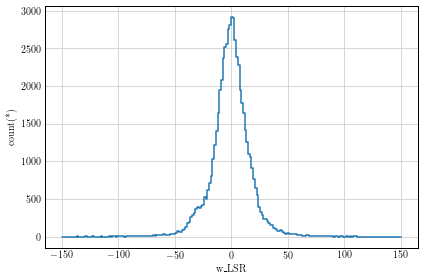

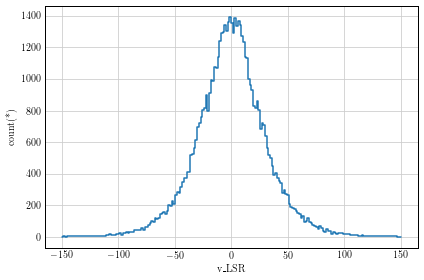

In [12]:

df_rv.viz.histogram("u_LSR", limits=[-150, 150], shape=200)
# plt.axvline(11.1, c="k")
plt.axvline(0, c="k")
plt.show()
df_rv.viz.histogram("w_LSR", limits=[-150, 150], shape=200, show=True)
df_rv.viz.histogram("v_LSR", limits=[-150, 150], shape=200, show=True)

In [13]:
df_rv

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR
0,0.004301747913975464,-1.3713712365508404,8.77,8.402,AAA,4635683001439449856,52.405643,6.083750336375101,0.014473084,-52.05131516947817,0.0170755,6.084070263466513,0.012370593,9.739897,10.054115,9.259166,2948.124,3927.41,0.98334277,1.198375,2.2006728782412583,-0.667469077944412,164.0287,163.6091,164.8086,0.0013,0.0002,0.0046,G,--,10.902939796447754,0.16833698749542236,gaia,5751.5439453125,2.11181640625,5.791015625,0.0,gspphot,4.159900188446045,0.0024003982543945312,0.0015997886657714844,0.0,gspphot,-0.10779999941587448,0.005900003015995026,0.007100000977516174,0.0,gspphot,0.019999999552965164,0.009999999776482582,0.019999999552965164,0.0,gspspec,-0.15000000596046448,0.12000000476837158,0.12000000663101673,0.0,gspspec,-0.15000000596046448,nan,nan,nan,--,0.36800003,2.690971562626711,164.36365076267728,-101.74113412975117,129.0897026025985,-18.774503486840842,48.92718516173083,0.014645726854753158,0.0169276560588158,38.118372672189736,-14.626909728836896,0.07861918077846189,-0.03185425505242847,23.188897995532177,0.12112157767100891,32.158349477759415,0.14088250554201617,-30.762724218692966,0.08688682310685122,-17.37126155447248,0.11538307459562744,2.5783971929631515,4.142245110066469,-17.37126155447248,-30.762724218692966,30.438897995532177
1,0.0032882177640498373,-1.2621910830881986,7.8,7.597,AAA,4701758461948318848,20.874498,-16.354367148195085,0.014716353,12.9722529499503,0.016420288,8.410454649576556,0.012681514,8.464083,8.652515,8.128385,1851.481,3608.0237,0.9388913,1.1831161,2.238763800213232,-0.7728458234774394,118.5254,117.8161,118.8247,0.0021,0.0003,0.0173,F,--,-1.0309404134750366,0.07304781675338745,apogee,6724.49755859375,3.4951171875,30.11328125,0.0,gspphot,4.15500020980835,0.0029001235961914062,0.013399600982666016,0.0,gspphot,-0.09715799987316132,0.0066741290502250195,0.0066741290502250195,1.0,apogee,0.699999988079071,0.039999961853027344,0.030000030994415283,0.0,gspspec,nan,nan,nan,nan,--,nan,0.005179196130484343,0.005179196130484343,1.0,apogee,0.20300007,2.424097557634834,118.89963642457157,-83.01280883143107,85.12342281541306,19.271926379475985,-8.021067574800421,0.014849782526185832,0.016299719960636998,-4.520547567124471,10.861354688276615,-0.011438887118832902,0.018391563582343014,-2.5166033425421523,0.05165351942975348,-3.8942131501853767,0.0529031719415193,10.939099198333349,0.035807943847210796,-3.6701540093908616,0.043067230813140504,1.3903859664790936,2.847701908629568,-3.6701540093908616,10.939099198333349,4.733396657457847
2,0.0071074868596039875,-1.2273890258172142,8.69,8.393,AAA,4702959678401321984,37.18967,23.58711228133474,0.011803952,-28.752733940266236,0.014449707,8.74803741556182,0.012488439,9.653302,9.947792,9.193761,2110.065,3865.7065,0.9105442,1.1956643,2.2506821387235147,-0.8066398204825131,114.0146,113.8348,114.2071,0.0009,0.0002,0.0024,G,--,24.771608352661133,0.21023516356945038,gaia,5889.33837890625,1.6259765625,2.79736328125,0.0,gspphot,4.333700180053711,0.0020003318786621094,0.00189971923828125,0.0,gspphot,-0.0892999991774559,0.004799999296665192,0.00469999760389328,0.0,gspphot,0.09000000357627869,0.01000000536441803,0.019999995827674866,0.0,gspspec,-0.05000000074505806,0.12000000104308128,0.10999999940395355,0.0,gspspec,-0.05000

In [25]:
col_v = "rv"
col = f"{col_v}_cat"

df_nan = df_rv[df_rv[col_v].isnan()]
df_nan = df_nan.extract() if len(df_nan) else []
none = len(df_nan)

df_g = df_rv[df_rv[col_v].notnan()].extract() if len(df_rv[df_rv[col_v].notnan()]) else []
df_g_missing = df_g[df_g[col].isna()].extract() if len(df_g[df_g[col].isna()]) else []
df_g_non_missing = df_g[df_g[col].notna()].extract() if len(df_g[df_g[col].notna()]) else []

df_g = df_g_non_missing.groupby(col, agg={'count': vaex.agg.count(col)})
df_g = df_g.to_pandas_df()
if len(df_g_missing) != 0:
    df_g = df_g.append({col: "gaia", "count": len(df_g_missing)}, ignore_index=True)
if none != 0:
    df_g = df_g.append({col: "none", "count": none}, ignore_index=True)
df_g.sort_values(by=col, ascending=True, inplace=True)
df_g

,rv_cat,count
1,apogee,4146
4,gaia,53092
0,galah,466
3,lamost,577
2,rave,719


In [14]:
col_v = "feh"
col = f"{col_v}_cat"

df_nan = df_rv[df_rv[col_v].isnan()].extract() if len(df_rv[df_rv[col_v].isnan()]) else []
none = len(df_nan)

df_g = df_rv[df_rv[col_v].notnan()].extract() if len(df_rv[df_rv[col_v].notnan()]) else []
df_g_missing = df_g[df_g[col].isna()].extract() if len(df_g[df_g[col].isna()]) else []
df_g_non_missing = df_g[df_g[col].notna()].extract() if len(df_g[df_g[col].notna()]) else []

df_g = df_g_non_missing.groupby(col, agg={'count': vaex.agg.count(col)})
df_g = df_g.to_pandas_df()
if len(df_g_missing) != 0:
    # df_g = df_g.append({col: "gaia", "count": len(df_g_missing)}, ignore_index=True)
    df_miss = pd.DataFrame({col: ["gaia"], "count": [len(df_g_missing)]})
    df_g = pd.concat([df_g, df_miss], ignore_index=True)
if none != 0:
    df_miss = pd.DataFrame({col: ["none"], "count": [none]})
    # df_g = df_g.append({col: "none", "count": none}, ignore_index=True)
    df_g = pd.concat([df_g, df_miss], ignore_index=True)
df_g.sort_values(by=col, ascending=True, inplace=True)
df_g

,feh_cat,count
1,apogee,3925
3,gaia,33363
0,galah,347
2,lamost,5309
4,none,16056


In [15]:
col_v = "mh"
col = f"{col_v}_cat"

df_nan = df_rv[df_rv[col_v].isnan()].extract() if len(df_rv[df_rv[col_v].isnan()]) else []
none = len(df_nan)

df_g = df_rv[df_rv[col_v].notnan()].extract() if len(df_rv[df_rv[col_v].notnan()]) else []
df_g_missing = df_g[df_g[col].isna()].extract() if len(df_g[df_g[col].isna()]) else []
df_g_non_missing = df_g[df_g[col].notna()].extract() if len(df_g[df_g[col].notna()]) else []

df_g = df_g_non_missing.groupby(col, agg={'count': vaex.agg.count(col)})
df_g = df_g.to_pandas_df()
if len(df_g_missing) != 0:
    df_miss = pd.DataFrame({col: ["gaia"], "count": [len(df_g_missing)]})
    # df_g = df_g.append({col: "gaia", "count": len(df_g_missing)}, ignore_index=True)
    df_g = pd.concat([df_g, df_miss], ignore_index=True)
if none != 0:
    # df_g = df_g.append({col: "none", "count": none}, ignore_index=True)
    df_miss = pd.DataFrame({col: ["none"], "count": [none]})
    df_g = pd.concat([df_g, df_miss], ignore_index=True)
df_g.sort_values(by=col, ascending=True, inplace=True)
df_g

,mh_cat,count
1,apogee,3095
2,gspphot,48526
0,gspspec,7008
4,none,351
3,rave,20


In [16]:
col_v = "alphafe"
col = f"{col_v}_cat"

df_nan = df_rv[df_rv[col_v].isnan()].extract() if len(df_rv[df_rv[col_v].isnan()]) else []
none = len(df_nan)

df_g = df_rv[df_rv[col_v].notnan()].extract() if len(df_rv[df_rv[col_v].notnan()]) else []
df_g_missing = df_g[df_g[col].isna()].extract() if len(df_g[df_g[col].isna()]) else []
df_g_non_missing = df_g[df_g[col].notna()].extract() if len(df_g[df_g[col].notna()]) else []

df_g = df_g_non_missing.groupby(col, agg={'count': vaex.agg.count(col)})
df_g = df_g.to_pandas_df()
if len(df_g_missing) != 0:
    # df_g = df_g.append({col: "gaia", "count": len(df_g_missing)}, ignore_index=True)
    df_miss = pd.DataFrame({col: ["gaia"], "count": [len(df_g_missing)]})
    df_g = pd.concat([df_g, df_miss], ignore_index=True)
if none != 0:
    # df_g = df_g.append({col: "none", "count": none}, ignore_index=True)
    df_miss = pd.DataFrame({col: ["none"], "count": [none]})
    df_g = pd.concat([df_g, df_miss], ignore_index=True)
df_g.sort_values(by=col, ascending=True, inplace=True)
df_g

,alphafe_cat,count
0,galah,45
1,gspspec,50721
3,none,7517
2,rave,717


In [17]:
df_mh = df_rv[df_rv.mh.notnan()].extract() if len(df_rv[df_rv.mh.notnan()]) else []
df_mh

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR
0,0.004301747913975464,-1.3713712365508404,8.77,8.402,AAA,4635683001439449856,52.405643,6.083750336375101,0.014473084,-52.05131516947817,0.0170755,6.084070263466513,0.012370593,9.739897,10.054115,9.259166,2948.124,3927.41,0.98334277,1.198375,2.2006728782412583,-0.667469077944412,164.0287,163.6091,164.8086,0.0013,0.0002,0.0046,G,--,10.902939796447754,0.16833698749542236,gaia,5751.5439453125,2.11181640625,5.791015625,0.0,gspphot,4.159900188446045,0.0024003982543945312,0.0015997886657714844,0.0,gspphot,-0.10779999941587448,0.005900003015995026,0.007100000977516174,0.0,gspphot,0.019999999552965164,0.009999999776482582,0.019999999552965164,0.0,gspspec,-0.15000000596046448,0.12000000476837158,0.12000000663101673,0.0,gspspec,-0.15000000596046448,nan,nan,nan,--,0.36800003,2.690971562626711,164.36365076267728,-101.74113412975117,129.0897026025985,-18.774503486840842,48.92718516173083,0.014645726854753158,0.0169276560588158,38.118372672189736,-14.626909728836896,0.07861918077846189,-0.03185425505242847,23.188897995532177,0.12112157767100891,32.158349477759415,0.14088250554201617,-30.762724218692966,0.08688682310685122,-17.37126155447248,0.11538307459562744,2.5783971929631515,4.142245110066469,-17.37126155447248,-30.762724218692966,30.438897995532177
1,0.0032882177640498373,-1.2621910830881986,7.8,7.597,AAA,4701758461948318848,20.874498,-16.354367148195085,0.014716353,12.9722529499503,0.016420288,8.410454649576556,0.012681514,8.464083,8.652515,8.128385,1851.481,3608.0237,0.9388913,1.1831161,2.238763800213232,-0.7728458234774394,118.5254,117.8161,118.8247,0.0021,0.0003,0.0173,F,--,-1.0309404134750366,0.07304781675338745,apogee,6724.49755859375,3.4951171875,30.11328125,0.0,gspphot,4.15500020980835,0.0029001235961914062,0.013399600982666016,0.0,gspphot,-0.09715799987316132,0.0066741290502250195,0.0066741290502250195,1.0,apogee,0.699999988079071,0.039999961853027344,0.030000030994415283,0.0,gspspec,nan,nan,nan,nan,--,nan,0.005179196130484343,0.005179196130484343,1.0,apogee,0.20300007,2.424097557634834,118.89963642457157,-83.01280883143107,85.12342281541306,19.271926379475985,-8.021067574800421,0.014849782526185832,0.016299719960636998,-4.520547567124471,10.861354688276615,-0.011438887118832902,0.018391563582343014,-2.5166033425421523,0.05165351942975348,-3.8942131501853767,0.0529031719415193,10.939099198333349,0.035807943847210796,-3.6701540093908616,0.043067230813140504,1.3903859664790936,2.847701908629568,-3.6701540093908616,10.939099198333349,4.733396657457847
2,0.0071074868596039875,-1.2273890258172142,8.69,8.393,AAA,4702959678401321984,37.18967,23.58711228133474,0.011803952,-28.752733940266236,0.014449707,8.74803741556182,0.012488439,9.653302,9.947792,9.193761,2110.065,3865.7065,0.9105442,1.1956643,2.2506821387235147,-0.8066398204825131,114.0146,113.8348,114.2071,0.0009,0.0002,0.0024,G,--,24.771608352661133,0.21023516356945038,gaia,5889.33837890625,1.6259765625,2.79736328125,0.0,gspphot,4.333700180053711,0.0020003318786621094,0.00189971923828125,0.0,gspphot,-0.0892999991774559,0.004799999296665192,0.00469999760389328,0.0,gspphot,0.09000000357627869,0.01000000536441803,0.019999995827674866,0.0,gspspec,-0.05000000074505806,0.12000000104308128,0.10999999940395355,0.0,gspspec,-0.05000

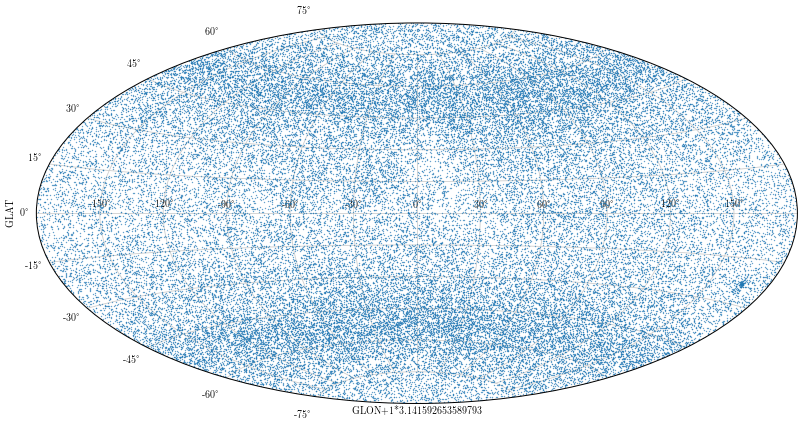

In [18]:
offset = 0
plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')

df_mh.viz.scatter(f"GLON-{1+offset}*3.141592653589793", "GLAT", length_check=False, s=0.1, alpha=1, c="C0")
df_mh.viz.scatter(f"GLON+{1-offset}*3.141592653589793", "GLAT", length_check=False, s=0.1, alpha=1,c="C0")
plt.grid(True)
plt.show()

In [19]:
df_mask = df_mh

In [20]:
df_mask["f_D"] = (norm.pdf(df_mask["u_LSR"].to_numpy(), loc=0, scale=35)*
                norm.pdf(df_mask["v_LSR"].to_numpy(), loc=-15, scale=20)*
                norm.pdf(df_mask["w_LSR"].to_numpy(), loc=0, scale=16))
df_mask["f_TD"] = (norm.pdf(df_mask["u_LSR"].to_numpy(), loc=0, scale=67)*
                norm.pdf(df_mask["v_LSR"].to_numpy(), loc=-46, scale=38)*
                norm.pdf(df_mask["w_LSR"].to_numpy(), loc=0, scale=35))
df_mask["f_H"] = (norm.pdf(df_mask["u_LSR"].to_numpy(), loc=0, scale=160)*
                norm.pdf(df_mask["v_LSR"].to_numpy(), loc=-220, scale=90)*
                norm.pdf(df_mask["w_LSR"].to_numpy(), loc=0, scale=90))
df_mask

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H
0,0.004301747913975464,-1.3713712365508404,8.77,8.402,AAA,4635683001439449856,52.405643,6.083750336375101,0.014473084,-52.05131516947817,0.0170755,6.084070263466513,0.012370593,9.739897,10.054115,9.259166,2948.124,3927.41,0.98334277,1.198375,2.2006728782412583,-0.667469077944412,164.0287,163.6091,164.8086,0.0013,0.0002,0.0046,G,--,10.902939796447754,0.16833698749542236,gaia,5751.5439453125,2.11181640625,5.791015625,0.0,gspphot,4.159900188446045,0.0024003982543945312,0.0015997886657714844,0.0,gspphot,-0.10779999941587448,0.005900003015995026,0.007100000977516174,0.0,gspphot,0.019999999552965164,0.009999999776482582,0.019999999552965164,0.0,gspspec,-0.15000000596046448,0.12000000476837158,0.12000000663101673,0.0,gspspec,-0.15000000596046448,nan,nan,nan,--,0.36800003,2.690971562626711,164.36365076267728,-101.74113412975117,129.0897026025985,-18.774503486840842,48.92718516173083,0.014645726854753158,0.0169276560588158,38.118372672189736,-14.626909728836896,0.07861918077846189,-0.03185425505242847,23.188897995532177,0.12112157767100891,32.158349477759415,0.14088250554201617,-30.762724218692966,0.08688682310685122,-17.37126155447248,0.11538307459562744,2.5783971929631515,4.142245110066469,-17.37126155447248,-30.762724218692966,30.438897995532177,6.014913173554138e-07,4.355655590722606e-07,5.043147607815727e-09
1,0.0032882177640498373,-1.2621910830881986,7.8,7.597,AAA,4701758461948318848,20.874498,-16.354367148195085,0.014716353,12.9722529499503,0.016420288,8.410454649576556,0.012681514,8.464083,8.652515,8.128385,1851.481,3608.0237,0.9388913,1.1831161,2.238763800213232,-0.7728458234774394,118.5254,117.8161,118.8247,0.0021,0.0003,0.0173,F,--,-1.0309404134750366,0.07304781675338745,apogee,6724.49755859375,3.4951171875,30.11328125,0.0,gspphot,4.15500020980835,0.0029001235961914062,0.013399600982666016,0.0,gspphot,-0.09715799987316132,0.0066741290502250195,0.0066741290502250195,1.0,apogee,0.699999988079071,0.039999961853027344,0.030000030994415283,0.0,gspspec,nan,nan,nan,nan,--,nan,0.005179196130484343,0.005179196130484343,1.0,apogee,0.20300007,2.424097557634834,118.89963642457157,-83.01280883143107,85.12342281541306,19.271926379475985,-8.021067574800421,0.014849782526185832,0.016299719960636998,-4.520547567124471,10.861354688276615,-0.011438887118832902,0.018391563582343014,-2.5166033425421523,0.05165351942975348,-3.8942131501853767,0.0529031719415193,10.939099198333349,0.035807943847210796,-3.6701540093908616,0.043067230813140504,1.3903859664790936,2.847701908629568,-3.6701540093908616,10.939099198333349,4.733396657457847,2.327330712787087e-06,2.2942606897602605e-07,1.818221181433702e-09
2,0.0071074868596039875,-1.2273890258172142,8.69,8.393,AAA,4702959678401321984,37.18967,23.58711228133474,0.011803952,-28.752733940266236,0.014449707,8.74803741556182,0.012488439,9.653302,9.947792,9.193761,2110.065,3865.7065,0.9105442,1.1956643,2.2506821387235147,-0.8066398204825131,114.0146,113.8348,114.2071,0.0009,0.0002,0.0024,G,--,24.771608352661133,0.21023516356945038,gaia,5889.33837890625,1.6259765625,2.79736328125,0.0,gspphot,4.333700180053711,0.0020003318786621094,0.00189971923828125,0.0,gspphot,-0.0892999991774559,0.004799999296665192,0.00469999760389328,0.0,gspphot,0.090000

In [21]:
df_mask["fTD_fD"] = df_mask["f_TD"]/df_mask["f_D"]
df_mask["fTD_fH"] = df_mask["f_TD"]/df_mask["f_H"]
df_mask

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH
0,0.004301747913975464,-1.3713712365508404,8.77,8.402,AAA,4635683001439449856,52.405643,6.083750336375101,0.014473084,-52.05131516947817,0.0170755,6.084070263466513,0.012370593,9.739897,10.054115,9.259166,2948.124,3927.41,0.98334277,1.198375,2.2006728782412583,-0.667469077944412,164.0287,163.6091,164.8086,0.0013,0.0002,0.0046,G,--,10.902939796447754,0.16833698749542236,gaia,5751.5439453125,2.11181640625,5.791015625,0.0,gspphot,4.159900188446045,0.0024003982543945312,0.0015997886657714844,0.0,gspphot,-0.10779999941587448,0.005900003015995026,0.007100000977516174,0.0,gspphot,0.019999999552965164,0.009999999776482582,0.019999999552965164,0.0,gspspec,-0.15000000596046448,0.12000000476837158,0.12000000663101673,0.0,gspspec,-0.15000000596046448,nan,nan,nan,--,0.36800003,2.690971562626711,164.36365076267728,-101.74113412975117,129.0897026025985,-18.774503486840842,48.92718516173083,0.014645726854753158,0.0169276560588158,38.118372672189736,-14.626909728836896,0.07861918077846189,-0.03185425505242847,23.188897995532177,0.12112157767100891,32.158349477759415,0.14088250554201617,-30.762724218692966,0.08688682310685122,-17.37126155447248,0.11538307459562744,2.5783971929631515,4.142245110066469,-17.37126155447248,-30.762724218692966,30.438897995532177,6.014913173554138e-07,4.355655590722606e-07,5.043147607815727e-09,0.7241427207749539,86.36779903035824
1,0.0032882177640498373,-1.2621910830881986,7.8,7.597,AAA,4701758461948318848,20.874498,-16.354367148195085,0.014716353,12.9722529499503,0.016420288,8.410454649576556,0.012681514,8.464083,8.652515,8.128385,1851.481,3608.0237,0.9388913,1.1831161,2.238763800213232,-0.7728458234774394,118.5254,117.8161,118.8247,0.0021,0.0003,0.0173,F,--,-1.0309404134750366,0.07304781675338745,apogee,6724.49755859375,3.4951171875,30.11328125,0.0,gspphot,4.15500020980835,0.0029001235961914062,0.013399600982666016,0.0,gspphot,-0.09715799987316132,0.0066741290502250195,0.0066741290502250195,1.0,apogee,0.699999988079071,0.039999961853027344,0.030000030994415283,0.0,gspspec,nan,nan,nan,nan,--,nan,0.005179196130484343,0.005179196130484343,1.0,apogee,0.20300007,2.424097557634834,118.89963642457157,-83.01280883143107,85.12342281541306,19.271926379475985,-8.021067574800421,0.014849782526185832,0.016299719960636998,-4.520547567124471,10.861354688276615,-0.011438887118832902,0.018391563582343014,-2.5166033425421523,0.05165351942975348,-3.8942131501853767,0.0529031719415193,10.939099198333349,0.035807943847210796,-3.6701540093908616,0.043067230813140504,1.3903859664790936,2.847701908629568,-3.6701540093908616,10.939099198333349,4.733396657457847,2.327330712787087e-06,2.2942606897602605e-07,1.818221181433702e-09,0.09857905785176428,126.18160613172444
2,0.0071074868596039875,-1.2273890258172142,8.69,8.393,AAA,4702959678401321984,37.18967,23.58711228133474,0.011803952,-28.752733940266236,0.014449707,8.74803741556182,0.012488439,9.653302,9.947792,9.193761,2110.065,3865.7065,0.9105442,1.1956643,2.2506821387235147,-0.8066398204825131,114.0146,113.8348,114.2071,0.0009,0.0002,0.0024,G,--,24.771608352661133,0.21023516356945038,gaia,5889.33837890625,1.6259765625,2.79736328125,0.0,gspphot,4.333700180053711,0.0020003318786621094,0.00189971923828125,0.0

/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages/vaex/arrow/numpy_dispatch.py:72: RuntimeWarning: divide by zero encountered in divide
  result_data = op['op'](a_data, b_data)


Text(0, 0.5, 'TD/D')

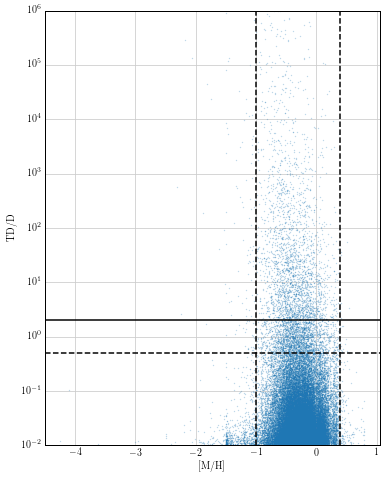

In [22]:
plt.figure(figsize=(6, 8))
df_mask.viz.scatter("mh", "fTD_fD*0.09/0.85", length_check=False, s=0.1, alpha=0.4)
plt.yscale("log")
plt.ylim(1e-2, 1e6)
plt.axvline(0.4, c="k", ls="--")
plt.axvline(-1, c="k", ls="--")
# plt.axvline(-0.3, c="r")
plt.axhline(2, c="k")
plt.axhline(0.5, c="k", ls="--")
plt.xlabel("[M/H]")
plt.ylabel("TD/D")
# plt.text(-4.2, 2E-1, "Piringan tipis")
# plt.text(-4.2, 0.9, "Antara")
# plt.text(-4.2, 4, "Piringan tebal")

In [23]:
len(df_mask)

58649

In [46]:
mh_D = (df_mask["mh"] < 0.4)*(df_mask["mh"] > -1)
TD_D = 0.09/0.85*df_mask["fTD_fD"] < 0.5
D = mh_D & TD_D
df_mask["thin"] = D
df_mask

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin,thick,halo
0,0.004301747913975464,-1.3713712365508404,8.77,8.402,AAA,4635683001439449856,52.405643,6.083750336375101,0.014473084,-52.05131516947817,0.0170755,6.084070263466513,0.012370593,9.739897,10.054115,9.259166,2948.124,3927.41,0.98334277,1.198375,2.2006728782412583,-0.667469077944412,164.0287,163.6091,164.8086,0.0013,0.0002,0.0046,G,--,10.902939796447754,0.16833698749542236,gaia,5751.5439453125,2.11181640625,5.791015625,0.0,gspphot,4.159900188446045,0.0024003982543945312,0.0015997886657714844,0.0,gspphot,-0.10779999941587448,0.005900003015995026,0.007100000977516174,0.0,gspphot,0.019999999552965164,0.009999999776482582,0.019999999552965164,0.0,gspspec,-0.15000000596046448,0.12000000476837158,0.12000000663101673,0.0,gspspec,-0.15000000596046448,nan,nan,nan,--,0.36800003,2.690971562626711,164.36365076267728,-101.74113412975117,129.0897026025985,-18.774503486840842,48.92718516173083,0.014645726854753158,0.0169276560588158,38.118372672189736,-14.626909728836896,0.07861918077846189,-0.03185425505242847,23.188897995532177,0.12112157767100891,32.158349477759415,0.14088250554201617,-30.762724218692966,0.08688682310685122,-17.37126155447248,0.11538307459562744,2.5783971929631515,4.142245110066469,-17.37126155447248,-30.762724218692966,30.438897995532177,6.014913173554138e-07,4.355655590722606e-07,5.043147607815727e-09,0.7241427207749539,86.36779903035824,True,False,False
1,0.0032882177640498373,-1.2621910830881986,7.8,7.597,AAA,4701758461948318848,20.874498,-16.354367148195085,0.014716353,12.9722529499503,0.016420288,8.410454649576556,0.012681514,8.464083,8.652515,8.128385,1851.481,3608.0237,0.9388913,1.1831161,2.238763800213232,-0.7728458234774394,118.5254,117.8161,118.8247,0.0021,0.0003,0.0173,F,--,-1.0309404134750366,0.07304781675338745,apogee,6724.49755859375,3.4951171875,30.11328125,0.0,gspphot,4.15500020980835,0.0029001235961914062,0.013399600982666016,0.0,gspphot,-0.09715799987316132,0.0066741290502250195,0.0066741290502250195,1.0,apogee,0.699999988079071,0.039999961853027344,0.030000030994415283,0.0,gspspec,nan,nan,nan,nan,--,nan,0.005179196130484343,0.005179196130484343,1.0,apogee,0.20300007,2.424097557634834,118.89963642457157,-83.01280883143107,85.12342281541306,19.271926379475985,-8.021067574800421,0.014849782526185832,0.016299719960636998,-4.520547567124471,10.861354688276615,-0.011438887118832902,0.018391563582343014,-2.5166033425421523,0.05165351942975348,-3.8942131501853767,0.0529031719415193,10.939099198333349,0.035807943847210796,-3.6701540093908616,0.043067230813140504,1.3903859664790936,2.847701908629568,-3.6701540093908616,10.939099198333349,4.733396657457847,2.327330712787087e-06,2.2942606897602605e-07,1.818221181433702e-09,0.09857905785176428,126.18160613172444,True,False,False
2,0.0071074868596039875,-1.2273890258172142,8.69,8.393,AAA,4702959678401321984,37.18967,23.58711228133474,0.011803952,-28.752733940266236,0.014449707,8.74803741556182,0.012488439,9.653302,9.947792,9.193761,2110.065,3865.7065,0.9105442,1.1956643,2.2506821387235147,-0.8066398204825131,114.0146,113.8348,114.2071,0.0009,0.0002,0.0024,G,--,24.771608352661133,0.21023516356945038,gaia,5889.33837890625,1.6259765625,2.79736328125,0.0,gspphot,4.33370018005

In [47]:
mh_TD = (df_mask["mh"] < 0.4)*(df_mask["mh"] > -1)
TD_D = 0.09/0.85*df_mask["fTD_fD"] > 2
TD = mh_TD & TD_D
df_mask["thick"] = TD
df_mask

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin,thick,halo
0,0.004301747913975464,-1.3713712365508404,8.77,8.402,AAA,4635683001439449856,52.405643,6.083750336375101,0.014473084,-52.05131516947817,0.0170755,6.084070263466513,0.012370593,9.739897,10.054115,9.259166,2948.124,3927.41,0.98334277,1.198375,2.2006728782412583,-0.667469077944412,164.0287,163.6091,164.8086,0.0013,0.0002,0.0046,G,--,10.902939796447754,0.16833698749542236,gaia,5751.5439453125,2.11181640625,5.791015625,0.0,gspphot,4.159900188446045,0.0024003982543945312,0.0015997886657714844,0.0,gspphot,-0.10779999941587448,0.005900003015995026,0.007100000977516174,0.0,gspphot,0.019999999552965164,0.009999999776482582,0.019999999552965164,0.0,gspspec,-0.15000000596046448,0.12000000476837158,0.12000000663101673,0.0,gspspec,-0.15000000596046448,nan,nan,nan,--,0.36800003,2.690971562626711,164.36365076267728,-101.74113412975117,129.0897026025985,-18.774503486840842,48.92718516173083,0.014645726854753158,0.0169276560588158,38.118372672189736,-14.626909728836896,0.07861918077846189,-0.03185425505242847,23.188897995532177,0.12112157767100891,32.158349477759415,0.14088250554201617,-30.762724218692966,0.08688682310685122,-17.37126155447248,0.11538307459562744,2.5783971929631515,4.142245110066469,-17.37126155447248,-30.762724218692966,30.438897995532177,6.014913173554138e-07,4.355655590722606e-07,5.043147607815727e-09,0.7241427207749539,86.36779903035824,True,False,False
1,0.0032882177640498373,-1.2621910830881986,7.8,7.597,AAA,4701758461948318848,20.874498,-16.354367148195085,0.014716353,12.9722529499503,0.016420288,8.410454649576556,0.012681514,8.464083,8.652515,8.128385,1851.481,3608.0237,0.9388913,1.1831161,2.238763800213232,-0.7728458234774394,118.5254,117.8161,118.8247,0.0021,0.0003,0.0173,F,--,-1.0309404134750366,0.07304781675338745,apogee,6724.49755859375,3.4951171875,30.11328125,0.0,gspphot,4.15500020980835,0.0029001235961914062,0.013399600982666016,0.0,gspphot,-0.09715799987316132,0.0066741290502250195,0.0066741290502250195,1.0,apogee,0.699999988079071,0.039999961853027344,0.030000030994415283,0.0,gspspec,nan,nan,nan,nan,--,nan,0.005179196130484343,0.005179196130484343,1.0,apogee,0.20300007,2.424097557634834,118.89963642457157,-83.01280883143107,85.12342281541306,19.271926379475985,-8.021067574800421,0.014849782526185832,0.016299719960636998,-4.520547567124471,10.861354688276615,-0.011438887118832902,0.018391563582343014,-2.5166033425421523,0.05165351942975348,-3.8942131501853767,0.0529031719415193,10.939099198333349,0.035807943847210796,-3.6701540093908616,0.043067230813140504,1.3903859664790936,2.847701908629568,-3.6701540093908616,10.939099198333349,4.733396657457847,2.327330712787087e-06,2.2942606897602605e-07,1.818221181433702e-09,0.09857905785176428,126.18160613172444,True,False,False
2,0.0071074868596039875,-1.2273890258172142,8.69,8.393,AAA,4702959678401321984,37.18967,23.58711228133474,0.011803952,-28.752733940266236,0.014449707,8.74803741556182,0.012488439,9.653302,9.947792,9.193761,2110.065,3865.7065,0.9105442,1.1956643,2.2506821387235147,-0.8066398204825131,114.0146,113.8348,114.2071,0.0009,0.0002,0.0024,G,--,24.771608352661133,0.21023516356945038,gaia,5889.33837890625,1.6259765625,2.79736328125,0.0,gspphot,4.33370018005

(0.01, 10000.0)

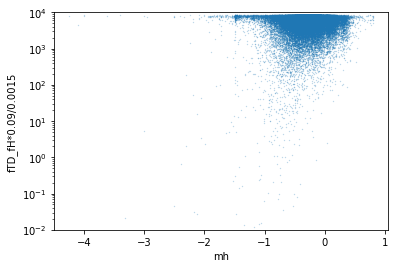

In [48]:
df_mask.viz.scatter("mh", "fTD_fH*0.09/0.0015", length_check=False, s=0.1, alpha=0.4)
plt.yscale("log")
plt.ylim(1e-2, 1e4)

In [49]:
TD_H = 0.09/0.0015*df_mask["fTD_fH"] < 1
df_mask["halo"] = TD_H
df_mask

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin,thick,halo
0,0.004301747913975464,-1.3713712365508404,8.77,8.402,AAA,4635683001439449856,52.405643,6.083750336375101,0.014473084,-52.05131516947817,0.0170755,6.084070263466513,0.012370593,9.739897,10.054115,9.259166,2948.124,3927.41,0.98334277,1.198375,2.2006728782412583,-0.667469077944412,164.0287,163.6091,164.8086,0.0013,0.0002,0.0046,G,--,10.902939796447754,0.16833698749542236,gaia,5751.5439453125,2.11181640625,5.791015625,0.0,gspphot,4.159900188446045,0.0024003982543945312,0.0015997886657714844,0.0,gspphot,-0.10779999941587448,0.005900003015995026,0.007100000977516174,0.0,gspphot,0.019999999552965164,0.009999999776482582,0.019999999552965164,0.0,gspspec,-0.15000000596046448,0.12000000476837158,0.12000000663101673,0.0,gspspec,-0.15000000596046448,nan,nan,nan,--,0.36800003,2.690971562626711,164.36365076267728,-101.74113412975117,129.0897026025985,-18.774503486840842,48.92718516173083,0.014645726854753158,0.0169276560588158,38.118372672189736,-14.626909728836896,0.07861918077846189,-0.03185425505242847,23.188897995532177,0.12112157767100891,32.158349477759415,0.14088250554201617,-30.762724218692966,0.08688682310685122,-17.37126155447248,0.11538307459562744,2.5783971929631515,4.142245110066469,-17.37126155447248,-30.762724218692966,30.438897995532177,6.014913173554138e-07,4.355655590722606e-07,5.043147607815727e-09,0.7241427207749539,86.36779903035824,True,False,False
1,0.0032882177640498373,-1.2621910830881986,7.8,7.597,AAA,4701758461948318848,20.874498,-16.354367148195085,0.014716353,12.9722529499503,0.016420288,8.410454649576556,0.012681514,8.464083,8.652515,8.128385,1851.481,3608.0237,0.9388913,1.1831161,2.238763800213232,-0.7728458234774394,118.5254,117.8161,118.8247,0.0021,0.0003,0.0173,F,--,-1.0309404134750366,0.07304781675338745,apogee,6724.49755859375,3.4951171875,30.11328125,0.0,gspphot,4.15500020980835,0.0029001235961914062,0.013399600982666016,0.0,gspphot,-0.09715799987316132,0.0066741290502250195,0.0066741290502250195,1.0,apogee,0.699999988079071,0.039999961853027344,0.030000030994415283,0.0,gspspec,nan,nan,nan,nan,--,nan,0.005179196130484343,0.005179196130484343,1.0,apogee,0.20300007,2.424097557634834,118.89963642457157,-83.01280883143107,85.12342281541306,19.271926379475985,-8.021067574800421,0.014849782526185832,0.016299719960636998,-4.520547567124471,10.861354688276615,-0.011438887118832902,0.018391563582343014,-2.5166033425421523,0.05165351942975348,-3.8942131501853767,0.0529031719415193,10.939099198333349,0.035807943847210796,-3.6701540093908616,0.043067230813140504,1.3903859664790936,2.847701908629568,-3.6701540093908616,10.939099198333349,4.733396657457847,2.327330712787087e-06,2.2942606897602605e-07,1.818221181433702e-09,0.09857905785176428,126.18160613172444,True,False,False
2,0.0071074868596039875,-1.2273890258172142,8.69,8.393,AAA,4702959678401321984,37.18967,23.58711228133474,0.011803952,-28.752733940266236,0.014449707,8.74803741556182,0.012488439,9.653302,9.947792,9.193761,2110.065,3865.7065,0.9105442,1.1956643,2.2506821387235147,-0.8066398204825131,114.0146,113.8348,114.2071,0.0009,0.0002,0.0024,G,--,24.771608352661133,0.21023516356945038,gaia,5889.33837890625,1.6259765625,2.79736328125,0.0,gspphot,4.33370018005

In [50]:
df_thin = df_mask[df_mask["thin"]].extract()
df_thick = df_mask[df_mask["thick"]].extract()
df_halo = df_mask[df_mask["halo"]].extract()


In [51]:
intermediate = df_mask["halo"] | df_mask["thick"] | df_mask["thin"]
intermediate = ~intermediate
df_intermediate = df_mask[intermediate].extract()

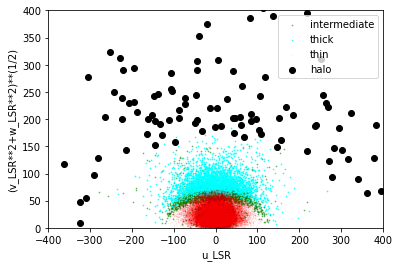

In [52]:
df_intermediate.viz.scatter("u_LSR", "(v_LSR**2+w_LSR**2)**(1/2)", c='green', alpha=0.5, s=0.5, length_check=False, label="intermediate")
df_thick.viz.scatter("u_LSR", "(v_LSR**2+w_LSR**2)**(1/2)", c='cyan', alpha=0.8, s=0.5, length_check=False, label="thick")
df_thin.viz.scatter("u_LSR", "(v_LSR**2+w_LSR**2)**(1/2)", c='r', alpha=0.1, s=0.1, length_check=False, label="thin")
df_halo.viz.scatter("u_LSR", "(v_LSR**2+w_LSR**2)**(1/2)", c='k', length_check=False, label="halo")
plt.xlabel("u_LSR")
plt.ylabel("(v_LSR**2+w_LSR**2)**(1/2)")
plt.xlim(-400, 400)
plt.ylim(0, 400)
plt.legend()
plt.show()

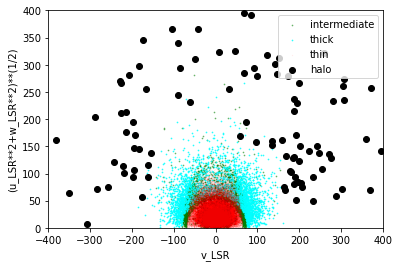

In [53]:
df_intermediate.viz.scatter("v_LSR", "(u_LSR**2+w_LSR**2)**(1/2)", c='green', alpha=0.5, s=0.5, length_check=False, label="intermediate")
df_thick.viz.scatter("v_LSR", "(u_LSR**2+w_LSR**2)**(1/2)", c='cyan', alpha=0.8, s=0.5, length_check=False, label="thick")
df_thin.viz.scatter("v_LSR", "(u_LSR**2+w_LSR**2)**(1/2)", c='r', alpha=0.1, s=0.1, length_check=False, label="thin")
df_halo.viz.scatter("v_LSR", "(u_LSR**2+w_LSR**2)**(1/2)", c='k', length_check=False, label="halo")
plt.xlabel("v_LSR")
plt.ylabel("(u_LSR**2+w_LSR**2)**(1/2)")
plt.xlim(-400, 400)
plt.ylim(0, 400)
plt.legend()
plt.show()

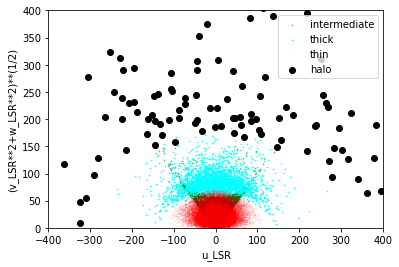

In [54]:
df_intermediate.viz.scatter("v_LSR", "(v_LSR**2+w_LSR**2)**(1/2)", c='green', alpha=0.5, s=0.5, length_check=False, label="intermediate")
df_thick.viz.scatter("u_LSR", "(v_LSR**2+w_LSR**2)**(1/2)", c='cyan', alpha=0.8, s=0.5, length_check=False, label="thick")
df_thin.viz.scatter("u_LSR", "(v_LSR**2+w_LSR**2)**(1/2)", c='r', alpha=0.1, s=0.1, length_check=False, label="thin")
df_halo.viz.scatter("u_LSR", "(v_LSR**2+w_LSR**2)**(1/2)", c='k', length_check=False, label="halo")
plt.xlabel("u_LSR")
plt.ylabel("(v_LSR**2+w_LSR**2)**(1/2)")
plt.xlim(-400, 400)
plt.ylim(0, 400)
plt.legend()
plt.show()

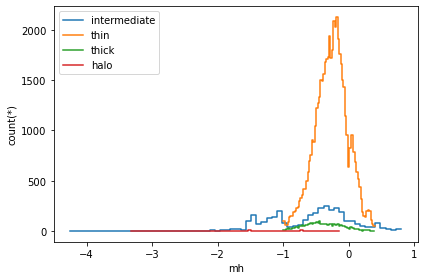

In [55]:
df_intermediate.viz.histogram("mh", label="intermediate")
df_thin.viz.histogram("mh", label="thin")
df_thick.viz.histogram("mh", label="thick")
df_halo.viz.histogram("mh", label="halo")
plt.legend()

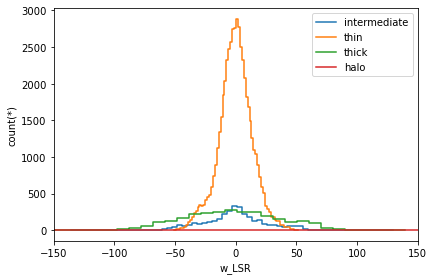

In [56]:
df_intermediate.viz.histogram("w_LSR", label="intermediate")
df_thin.viz.histogram("w_LSR", label="thin")
df_thick.viz.histogram("w_LSR", label="thick")
df_halo.viz.histogram("w_LSR", label="halo")
plt.xlim(-150, 150)
plt.legend()

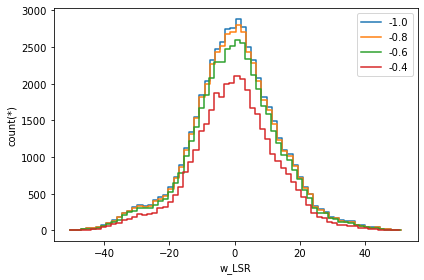

In [57]:
for mh in np.arange(-1, -0.3, 0.2):
    df_thin.filter("mh > {}".format(mh)).viz.histogram("w_LSR", label=f"{mh:0.1f}")
plt.legend()

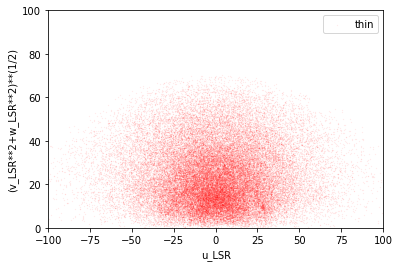

In [58]:
df_thin.viz.scatter("u_LSR", "(v_LSR**2+w_LSR**2)**(1/2)", c='r', alpha=0.1, s=0.1, length_check=False, label="thin")
plt.xlim(-100, 100)
plt.ylim(0, 100)
plt.legend()
plt.show()

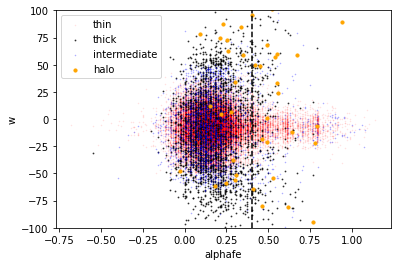

In [67]:
df_thin.viz.scatter("alphafe", "w", c='r', alpha=0.1, s=0.3, length_check=False, label="thin")
df_thick.viz.scatter("alphafe", "w", c='k', alpha=0.7, s=0.7, length_check=False, label="thick")
df_intermediate.viz.scatter("alphafe", "w", c='b', alpha=0.3, s=0.3, length_check=False, label="intermediate")
df_halo.viz.scatter("alphafe", "w", c='orange', alpha=1, s=10, length_check=False, label="halo")
# plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.axvline(0.4, c="k", ls="--")
plt.legend()
plt.show()

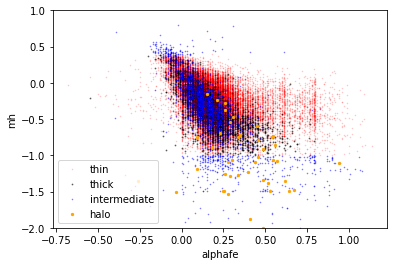

In [78]:
df_thin.viz.scatter("alphafe", "mh", c='r', alpha=0.2, s=0.3, length_check=False, label="thin")
df_thick.viz.scatter("alphafe", "mh", c='k', alpha=0.5, s=0.7, length_check=False, label="thick")
df_intermediate.viz.scatter("alphafe", "mh", c='b', alpha=0.5, s=0.3, length_check=False, label="intermediate")
df_halo.viz.scatter("alphafe", "mh", c='orange', alpha=1, s=5, length_check=False, label="halo")
# plt.xlim(-100, 100)
plt.ylim(-2, 1)
# plt.axvline(0.4, c="k", ls="--")
plt.legend()
plt.show()

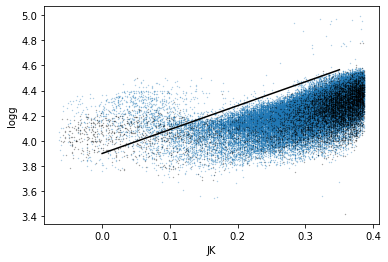

In [79]:
x = np.linspace(0, 0.35)
a = 1.9
b = 3.9
y = a*x+b
df_thin.viz.scatter("JK", "logg", s=0.1, alpha=0.5, length_check=False)
df_thick.viz.scatter("JK", "logg", c="k", s=0.1, alpha=0.5, length_check=False)
df_intermediate.viz.scatter("JK", "logg", c="k", s=0.1, alpha=0.5, length_check=False)
plt.plot(x, y, c="k")

In [80]:
df_thin.export(join(data_dir, "thin-AG-extended.hdf5"), progress=True)
df_thick.export(join(data_dir, "thick-AG-extended.hdf5"), progress=True)
df_intermediate.export(join(data_dir, "intermediate-AG-extended.hdf5"), progress=True)
df_halo.export(join(data_dir, "halo-AG-extended.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     1.76s =  0.0m =  0.0h   
export(hdf5) [########################################] 100.00% elapsed time  :     1.69s =  0.0m =  0.0h  
export(hdf5) [----------------------------------------]  0.00% estimated time: unknown                 

/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages/vaex/arrow/numpy_dispatch.py:72: RuntimeWarning: divide by zero encountered in divide
  result_data = op['op'](a_data, b_data)


export(hdf5) [########################################] 100.00% elapsed time  :     1.42s =  0.0m =  0.0h   
export(hdf5) [########################################] 100.00% elapsed time  :     1.42s =  0.0m =  0.0h    
 

In [5]:
df = vaex.open(join(data_dir, "thin-AG-extended.hdf5"))
df

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,thin,thick,halo
0,0.004301747913975464,-1.3713712365508404,8.77,8.402,AAA,4635683001439449856,52.405643,6.083750336375101,0.014473084,-52.05131516947817,0.0170755,6.084070263466513,0.012370593,9.739897,10.054115,9.259166,2948.124,3927.41,0.98334277,1.198375,2.2006728782412583,-0.667469077944412,164.0287,163.6091,164.8086,0.0013,0.0002,0.0046,G,--,10.902939796447754,0.16833698749542236,gaia,5751.5439453125,2.11181640625,5.791015625,0.0,gspphot,4.159900188446045,0.0024003982543945312,0.0015997886657714844,0.0,gspphot,-0.10779999941587448,0.005900003015995026,0.007100000977516174,0.0,gspphot,0.019999999552965164,0.009999999776482582,0.019999999552965164,0.0,gspspec,-0.15000000596046448,0.12000000476837158,0.12000000663101673,0.0,gspspec,-0.15000000596046448,nan,nan,nan,--,0.36800003,2.690971562626711,164.36365076267728,-101.74113412975117,129.0897026025985,-18.774503486840842,48.92718516173083,0.014645726854753158,0.0169276560588158,38.118372672189736,-14.626909728836896,0.07861918077846189,-0.03185425505242847,23.188897995532177,0.12112157767100891,32.158349477759415,0.14088250554201617,-30.762724218692966,0.08688682310685122,-17.37126155447248,0.11538307459562744,2.5783971929631515,4.142245110066469,-17.37126155447248,-30.762724218692966,30.438897995532177,6.014913173554138e-07,4.355655590722606e-07,5.043147607815727e-09,0.7241427207749539,86.36779903035824,True,False,False
1,0.0032882177640498373,-1.2621910830881986,7.8,7.597,AAA,4701758461948318848,20.874498,-16.354367148195085,0.014716353,12.9722529499503,0.016420288,8.410454649576556,0.012681514,8.464083,8.652515,8.128385,1851.481,3608.0237,0.9388913,1.1831161,2.238763800213232,-0.7728458234774394,118.5254,117.8161,118.8247,0.0021,0.0003,0.0173,F,--,-1.0309404134750366,0.07304781675338745,apogee,6724.49755859375,3.4951171875,30.11328125,0.0,gspphot,4.15500020980835,0.0029001235961914062,0.013399600982666016,0.0,gspphot,-0.09715799987316132,0.0066741290502250195,0.0066741290502250195,1.0,apogee,0.699999988079071,0.039999961853027344,0.030000030994415283,0.0,gspspec,nan,nan,nan,nan,--,nan,0.005179196130484343,0.005179196130484343,1.0,apogee,0.20300007,2.424097557634834,118.89963642457157,-83.01280883143107,85.12342281541306,19.271926379475985,-8.021067574800421,0.014849782526185832,0.016299719960636998,-4.520547567124471,10.861354688276615,-0.011438887118832902,0.018391563582343014,-2.5166033425421523,0.05165351942975348,-3.8942131501853767,0.0529031719415193,10.939099198333349,0.035807943847210796,-3.6701540093908616,0.043067230813140504,1.3903859664790936,2.847701908629568,-3.6701540093908616,10.939099198333349,4.733396657457847,2.327330712787087e-06,2.2942606897602605e-07,1.818221181433702e-09,0.09857905785176428,126.18160613172444,True,False,False
2,0.0071074868596039875,-1.2273890258172142,8.69,8.393,AAA,4702959678401321984,37.18967,23.58711228133474,0.011803952,-28.752733940266236,0.014449707,8.74803741556182,0.012488439,9.653302,9.947792,9.193761,2110.065,3865.7065,0.9105442,1.1956643,2.2506821387235147,-0.8066398204825131,114.0146,113.8348,114.2071,0.0009,0.0002,0.0024,G,--,24.771608352661133,0.21023516356945038,gaia,5889.33837890625,1.6259765625,2.79736328125,0.0,gspphot,4.33370018005

In [7]:
J, M_J = df["Jmag"].to_numpy(), df["M_J"].to_numpy()
# estimate J and M_J density using gausian kernel density estimation
from scipy.stats import gaussian_kde
J_grid, M_J_grid = np.mgrid[J.min():J.max():101j, M_J.min():M_J.max():100j]
positions = np.vstack([J_grid.ravel(), M_J_grid.ravel()])
values = np.vstack([J, M_J])
kernel = gaussian_kde(values)
dummy_kernel = np.rot90(kernel(positions).reshape(J_grid.shape))
dummy_kernel.shape

(100, 101)

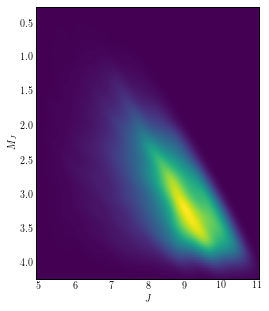

In [20]:
plt.figure(figsize=(4,5))
plt.imshow(dummy_kernel, extent=[J.min(), J.max(), M_J.min(), M_J.max()], aspect="auto", cmap="viridis")
# plt.colorbar()
# plt.plot(jk, mj, 'k.', markersize=0.1, alpha=0.5)
plt.gca().invert_yaxis()
plt.xlabel(r"$J$")
plt.ylabel(r"$M_J$")
plt.grid(False)
plt.savefig("cmd.pdf")
plt.show()